In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
import pandas as pd
import numpy as np
import sklearn
import fastai

In [3]:
import fastai.medical.imaging as med_img
import fastai.medical.text as med_text

In [9]:
import pydicom
import matplotlib.pyplot as plt

In [5]:
filename = '01010000265254/ARIN1J7K5QQ7BeDIUIAP8PM4NVSG41D1DU1S970T5PVP84VGN999B'
dataset = pydicom.dcmread(filename)

In [ ]:
def check_frontal(dcm):


Filename.........: 01010000265254/ARIN1J7K5QQ7BeDIUIAP8PM4NVSG41D1DU1S970T5PVP84VGN999B
Storage type.....: 1.2.840.10008.5.1.4.1.1.1

Patient's name...: 1234, 
Patient id.......: 1234
Modality.........: CR
Study Date.......: 20190117
Image size.......: 1794 x 1144, 4104672 bytes
Pixel spacing....: None
Slice location...: (missing)


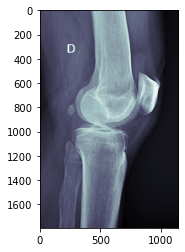

In [10]:
# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [11]:
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1216.1158.1243.113.1196.184.20190117113311.12
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.403.1.40.2.0.9.0
(0002, 0013) Implementation Version Name         SH: 'RAIMDicom_2.0'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 848
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1216.1158.1